In [1]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go

import tensorflow as tf
import numpy as np
import pandas as pd
import sqlalchemy

import sklearn.metrics as metrics
from tensorflow.python.data import Dataset

In [2]:
#getting movies dataset using Pandas from movie_metadata provided by Prof Zhang
movies_dataframe =  pd.read_csv("movie_metadata.csv", sep=",")
movies_dataframe

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [3]:
#getting actors dataset using Pandas from BuzzFeed
actors_dataframe = pd.read_csv("actor-metrics.csv", sep=",")

In [4]:
#getting biopics dataset using Pandas from 
biopics_dataframe = pd.read_csv("biopics.csv", sep=",", encoding='latin-1')

In [5]:
#renaming the lead actors column name for each table to have the same name 'lead_actors'
movies_dataframe = movies_dataframe.rename(columns={'actor_1_name': 'lead_actors'})
actors_dataframe = actors_dataframe.rename(columns={'actor': 'lead_actors'})
biopics_dataframe = biopics_dataframe.rename(columns={'lead_actor_actress': 'lead_actors'})

In [6]:
#Clean Up Part 1: Remove unnecessary columns
#I think we should first eliminate unnecessary columns and then merge, this way the table is easier to look at
#We should remove movies that are too old for us to look at!
movies_dataframe = movies_dataframe[['lead_actors', 'movie_title', 'title_year', 'gross', 'movie_facebook_likes']]
actors_dataframe = actors_dataframe[['lead_actors', 'gender', 'race_simple']]

In [7]:
#Clean Up Part 2: Merge
movies_dataframe_merged = movies_dataframe.merge(actors_dataframe,on='lead_actors').query('title_year>=2010.0')
# Something doesn't seem to work. On the right part of the big table there are weird things happening: 
# Another director than at the start, other films? Somehow we can not merge the tables this way I think? 
# Or is this part not about movies but just the actors? Then we really need to get rid of most columns!

In [8]:
movies_dataframe_merged

,lead_actors,movie_title,title_year,gross,movie_facebook_likes,gender,race_simple
0,Tom Hardy,The Dark Knight Rises,2012.0,448130642.0,164000,male,White
1,Tom Hardy,The Dark Knight Rises,2012.0,448130642.0,164000,male,White
2,Tom Hardy,The Dark Knight Rises,2012.0,448130642.0,164000,male,White
3,Tom Hardy,Mad Max: Fury Road,2015.0,153629485.0,191000,male,White
4,Tom Hardy,Mad Max: Fury Road,2015.0,153629485.0,191000,male,White
5,Tom Hardy,Mad Max: Fury Road,2015.0,153629485.0,191000,male,White
6,Tom Hardy,This Means War,2012.0,54758461.0,18000,male,White
7,Tom Hardy,This Means War,2012.0,54758461.0,18000,male,White
8,Tom Hardy,This Means War,2012.0,54758461.0,18000,male,White
12,Tom Hardy,Child 44,2015.0,1206135.0,18000,male,White


In [9]:
#Clean Up Part 3: Remove duplicates
#remove duplicates based on the movie – even though the actors are still duplicated but they worked on different projects with different gross
movies_dataframe_noDuplicates = movies_dataframe_merged.drop_duplicates(subset=['movie_title'], keep='first', inplace=False)
movies_dataframe_noDuplicates

,lead_actors,movie_title,title_year,gross,movie_facebook_likes,gender,race_simple
0,Tom Hardy,The Dark Knight Rises,2012.0,448130642.0,164000,male,White
3,Tom Hardy,Mad Max: Fury Road,2015.0,153629485.0,191000,male,White
6,Tom Hardy,This Means War,2012.0,54758461.0,18000,male,White
12,Tom Hardy,Child 44,2015.0,1206135.0,18000,male,White
15,Tom Hardy,Legend,2015.0,1865774.0,43000,male,White
18,Tom Hardy,Warrior,2011.0,13651662.0,77000,male,White
34,Peter Dinklage,Ice Age: Continental Drift,2012.0,161317423.0,14000,male,White
35,Peter Dinklage,Pixels,2015.0,78747585.0,39000,male,White
36,Peter Dinklage,The Angry Birds Movie,2016.0,107225164.0,14000,male,White
38,Peter Dinklage,The Boss,2016.0,63034755.0,0,male,White


In [10]:
# VISUALIZATION
# Part 1: Categorization and data preparation

# First, get data for top categories: male (M) - female (F), white (W) - not white (N)
# TODO: Some data is missing! How do we fill it? Else it can ruin our statistics!
movies_f = movies_dataframe_noDuplicates.query('gender=="female"')
movies_m = movies_dataframe_noDuplicates.query('gender=="male"')
movies_w = movies_dataframe_noDuplicates.query('race_simple=="White"')
movies_n = movies_dataframe_noDuplicates.query('race_simple=="POC"')

# group and aggregate by title year
# https://stackoverflow.com/questions/46826773/how-can-i-merge-rows-by-same-value-in-a-column-in-pandas-with-aggregation-func
movies_f_sum_by_year = movies_f.groupby(by='title_year', sort=True).aggregate({'gross': 'sum', 'movie_facebook_likes': 'sum'}).reset_index()
movies_m_sum_by_year = movies_m.groupby(by='title_year', sort=True).aggregate({'gross': 'sum', 'movie_facebook_likes': 'sum'}).reset_index()
movies_w_sum_by_year = movies_w.groupby(by='title_year', sort=True).aggregate({'gross': 'sum', 'movie_facebook_likes': 'sum'}).reset_index()
movies_n_sum_by_year = movies_n.groupby(by='title_year', sort=True).aggregate({'gross': 'sum', 'movie_facebook_likes': 'sum'}).reset_index()

In [11]:
#Adding to the db if no values for a year are available
print('Movies with non white lead actors, unedited table \n', movies_n_sum_by_year)

#Since there is no data for movies_n_sum_by_year for years 2012 and 2015, we add 0s there.
movies_n_sum_by_year = movies_n_sum_by_year.append(pd.DataFrame([[2012.0,0,0],[2015.0,0,0]], columns=['title_year', 'gross', 'movie_facebook_likes'])).sort_values(by='title_year')
print('Movies with non white lead actors*, 0-values added for completeness \n', movies_n_sum_by_year)

Movies with non white lead actors, unedited table 
    title_year        gross  movie_facebook_likes
0      2011.0   80409145.0                 17000
1      2013.0  210167968.0                176000
2      2014.0  299775680.0                 64000
3      2016.0          0.0                     0
Movies with non white lead actors*, 0-values added for completeness 
    title_year        gross  movie_facebook_likes
0      2011.0   80409145.0                 17000
0      2012.0          0.0                     0
1      2013.0  210167968.0                176000
2      2014.0  299775680.0                 64000
1      2015.0          0.0                     0
3      2016.0          0.0                     0


In [12]:
#Next, get data for sub categories: male & white, male & not white, female & white, female & not white
movies_mw = movies_m.query('race_simple=="White"')
movies_mn = movies_m.query('race_simple=="POC"')
movies_fw = movies_f.query('race_simple=="White"')
movies_fn = movies_f.query('race_simple=="POC"')

# group and aggregate by title year
# https://stackoverflow.com/questions/46826773/how-can-i-merge-rows-by-same-value-in-a-column-in-pandas-with-aggregation-func
movies_fw_sum_by_year = movies_fw.groupby(by='title_year', sort=True).aggregate({'gross': 'sum', 'movie_facebook_likes': 'sum'}).reset_index()
movies_mw_sum_by_year = movies_mw.groupby(by='title_year', sort=True).aggregate({'gross': 'sum', 'movie_facebook_likes': 'sum'}).reset_index()
movies_fn_sum_by_year = movies_fn.groupby(by='title_year', sort=True).aggregate({'gross': 'sum', 'movie_facebook_likes': 'sum'}).reset_index()
movies_mn_sum_by_year = movies_mn.groupby(by='title_year', sort=True).aggregate({'gross': 'sum', 'movie_facebook_likes': 'sum'}).reset_index()

In [13]:
#Adding to database if no data for a year is available
print('Movies with non white lead actresses, unedited table \n', movies_fn_sum_by_year)

#Since there is no data for movies_n_sum_by_year for years 2012 and 2015, we add 0s there.
movies_fn_sum_by_year = movies_fn_sum_by_year.append(pd.DataFrame([[2010.0,0,0],[2011.0,0,0],[2012.0,0,0],[2013.0,0,0],[2014.0,0,0],[2015.0,0,0],[2016.0,0,0]], columns=['title_year', 'gross', 'movie_facebook_likes'])).sort_values(by='title_year')
print('Movies with non white lead actors, 0-values added for completeness \n', movies_fn_sum_by_year)

print('Movies with non white lead actors, unedited table \n', movies_mn_sum_by_year)

#Since there is no data for movies_n_sum_by_year for years 2012 and 2015, we add 0s there.
movies_mn_sum_by_year = movies_mn_sum_by_year.append(pd.DataFrame([[2012.0,0,0],[2015.0,0,0]], columns=['title_year', 'gross', 'movie_facebook_likes'])).sort_values(by='title_year')
print('Movies with non white lead actors, 0-values added for completeness \n', movies_mn_sum_by_year)

Movies with non white lead actresses, unedited table 
 Empty DataFrame
Columns: [title_year, gross, movie_facebook_likes]
Index: []
Movies with non white lead actors, 0-values added for completeness 
    title_year  gross  movie_facebook_likes
0      2010.0    0.0                     0
1      2011.0    0.0                     0
2      2012.0    0.0                     0
3      2013.0    0.0                     0
4      2014.0    0.0                     0
5      2015.0    0.0                     0
6      2016.0    0.0                     0
Movies with non white lead actors, unedited table 
    title_year        gross  movie_facebook_likes
0      2011.0   80409145.0                 17000
1      2013.0  210167968.0                176000
2      2014.0  299775680.0                 64000
3      2016.0          0.0                     0
Movies with non white lead actors, 0-values added for completeness 
    title_year        gross  movie_facebook_likes
0      2011.0   80409145.0              

In [63]:
# Part 2: Bar diagrams for overall development

# The following function creates a bar chart with two y-Axis and one x-Axis.
def vis_bar(title, x_axis, y_axis1, y_label1, y_axis2, y_label2, *positional_parameters, **keyword_parameters):
    ind = np.arange(len(x_axis))
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    ax2 = ax.twinx() #https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib#14762601

    #https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
    rects1 = ax.bar(ind - width/2, y_axis1, width, yerr=0, xerr=0,
                color='SkyBlue', label=y_label1)
    rects2 = ax2.bar(ind + width/2, y_axis2, width, yerr=0, xerr=0,
                color='IndianRed', label=y_label2)
    
    ax.set_ylabel(y_label1)
    ax2.set_ylabel(y_label2)
    
    ax.legend(bbox_to_anchor=(1.3, 1), loc=2, borderaxespad=0.)
    ax2.legend(bbox_to_anchor=(1.3, 0.9), loc=2, borderaxespad=0.)
    
    ax.set_xticks(ind)
    ax.set_xticklabels(x_axis)
    
    plt.title(label=title, pad=20.0, loc='left')
    
    #https://stackoverflow.com/questions/14017996/is-there-a-way-to-pass-optional-parameters-to-a-function
    if('horizontal_xlabels' not in keyword_parameters):
        #https://stackoverflow.com/questions/12273712/matplotlib-xticks-labels-overlap
        plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
    
    path='graphs/' + title.replace(" ", "").replace("*", "").replace(":", "") + '.png'
    fig.savefig(path, transparent=True, bbox_inches='tight') #save the graph
    print('saved to ', path)
    
    plt.show()

In [15]:
# Creating bar charts for all top categories
# Commented out because this doesn't have to run each time.
# vis_bar(title='N: Not white lead actors*: Development', x_axis=movies_n_sum_by_year['title_year'], y_axis1=movies_n_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_n_sum_by_year['movie_facebook_likes'], y_label2='Facebook Likes')
# vis_bar(title='W: White lead actors*: Development', x_axis=movies_w_sum_by_year['title_year'], y_axis1=movies_w_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_w_sum_by_year['movie_facebook_likes'], y_label2='Facebook Likes')
# vis_bar(title='F: Female lead actresses: Development', x_axis=movies_f_sum_by_year['title_year'], y_axis1=movies_f_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_f_sum_by_year['movie_facebook_likes'], y_label2='Facebook Likes')
# vis_bar(title='M: Male lead actors: Development', x_axis=movies_m_sum_by_year['title_year'], y_axis1=movies_m_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_m_sum_by_year['movie_facebook_likes'], y_label2='Facebook Likes')

In [16]:
# Creating bar charts for all sub categories
# Commented out because this doesn't have to run each time.
# vis_bar(title='FN: Not white lead actresses: Development', x_axis=movies_fn_sum_by_year['title_year'], y_axis1=movies_fn_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_fn_sum_by_year['movie_facebook_likes'], y_label2='Facebook Likes')
# vis_bar(title='FW: White lead actresses: Development', x_axis=movies_fw_sum_by_year['title_year'], y_axis1=movies_fw_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_fw_sum_by_year['movie_facebook_likes'], y_label2='Facebook Likes')
# vis_bar(title='MN: Not white lead actors: Development', x_axis=movies_mn_sum_by_year['title_year'], y_axis1=movies_mn_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_mn_sum_by_year['movie_facebook_likes'], y_label2='Facebook Likes')
# vis_bar(title='MW: White lead actors: Development', x_axis=movies_mw_sum_by_year['title_year'], y_axis1=movies_mw_sum_by_year['gross'], y_label1='Domestic Gross Revenue', y_axis2=movies_mw_sum_by_year['movie_facebook_likes'], y_label2='Facebook Likes')

In [48]:
#Part 3: calculate total and average domestic gross revenue and fb likes per top category and per sub category 
#and make a dataframe from it
#columns: CATEGORY | total fb likes | average fb likes | total domestic gross revenue | average domestic gross revenue 
#categories: 
# df 1 g: M, F, 
# df 2 r: W, N; 
# df 3 gr: MW, MN, FW, FN
def sumAndAvg(col1, col2):
    row = [0,0,0,0]
    i = 0
    for col in [col1, col2]:
        row[i] = col.sum()
        i+=1
        row[i] = col.mean()
        i+=1
    return row

dfs = [movies_m_sum_by_year, movies_f_sum_by_year, movies_w_sum_by_year, movies_n_sum_by_year, movies_mw_sum_by_year, movies_mn_sum_by_year, movies_fw_sum_by_year, movies_fn_sum_by_year]

columns=['total_gross', 'average_gross', 'total_movie_facebook_likes', 'average_movie_facebook_likes']
categories = ['m', 'f', 'w', 'n', 'mw', 'mn', 'fw', 'fn']
rows = [sumAndAvg(df['gross'], df['movie_facebook_likes']) for df in dfs]

statisticalResults = pd.DataFrame(rows, columns=columns).assign(category=categories)
print(statisticalResults)

    total_gross  average_gross  total_movie_facebook_likes  \
0  7.574315e+09   1.082045e+09                     3881885   
1  1.475912e+09   2.108445e+08                      753000   
2  8.459874e+09   1.208553e+09                     4377885   
3  5.903528e+08   9.839213e+07                      257000   
4  6.983962e+09   9.977089e+08                     3624885   
5  5.903528e+08   9.839213e+07                      257000   
6  1.475912e+09   2.108445e+08                      753000   
7  0.000000e+00   0.000000e+00                           0   

   average_movie_facebook_likes category  
0                 554555.000000        m  
1                 107571.428571        f  
2                 625412.142857        w  
3                  42833.333333        n  
4                 517840.714286       mw  
5                  42833.333333       mn  
6                 107571.428571       fw  
7                      0.000000       fn  


In [54]:
#Part 4: Get own dataframes for each category: gender, race, race and gender
g = statisticalResults[(statisticalResults.category == 'm') | (statisticalResults.category == 'f')]
r = statisticalResults[(statisticalResults.category == 'w') | (statisticalResults.category == 'n')]
gr = statisticalResults[(statisticalResults.category == 'mw') | (statisticalResults.category == 'fw') | (statisticalResults.category == 'mn') | (statisticalResults.category == 'fn')]

saved to  graphs/GenderTotal.png


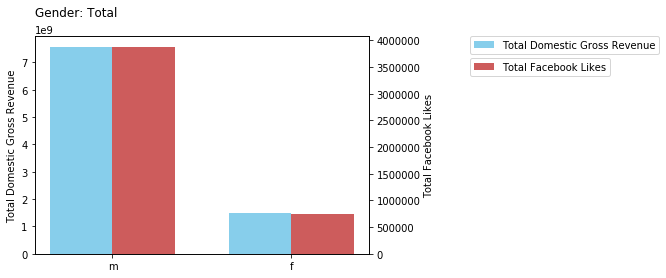

saved to  graphs/RaceTotal.png


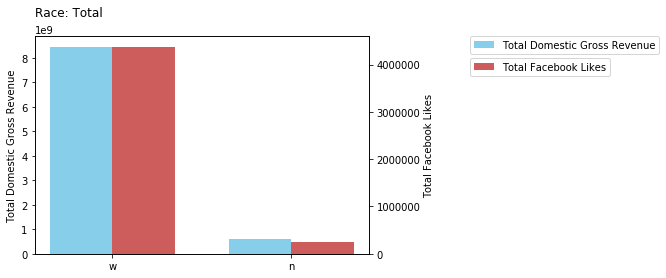

saved to  graphs/RaceandGenderTotal.png


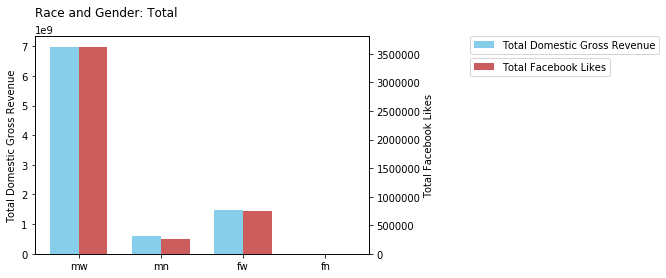

In [67]:
#Part 5: Compare total dgr & fb likes per categories with bar diagrams
#Commented out because not needed to run every time
#vis_bar(title='Gender: Total', x_axis=g['category'], y_axis1=g['total_gross'], y_label1='Total Domestic Gross Revenue', y_axis2=g['total_movie_facebook_likes'], y_label2='Total Facebook Likes', horizontal_xlabels=True)
#vis_bar(title='Race: Total', x_axis=r['category'], y_axis1=r['total_gross'], y_label1='Total Domestic Gross Revenue', y_axis2=r['total_movie_facebook_likes'], y_label2='Total Facebook Likes', horizontal_xlabels=True)

#vis_bar(title='Race and Gender: Total', x_axis=gr['category'], y_axis1=gr['total_gross'], y_label1='Total Domestic Gross Revenue', y_axis2=gr['total_movie_facebook_likes'], y_label2='Total Facebook Likes', horizontal_xlabels=True)

saved to  graphs/GenderAverage.png


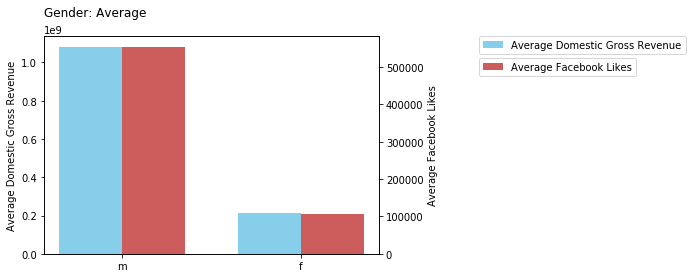

saved to  graphs/RaceAverage.png


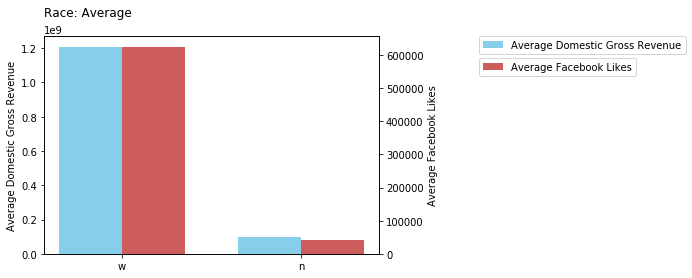

saved to  graphs/RaceandGenderAverage.png


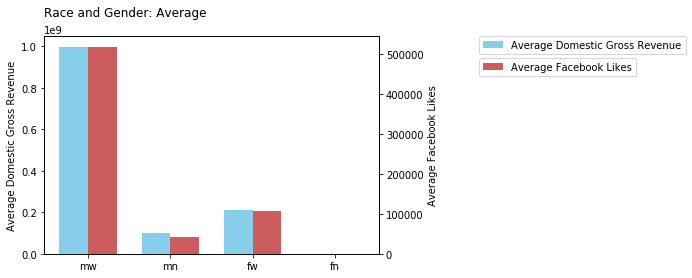

In [68]:
#Part 6: Compare average dgr & fb likes per categories
#Commented out because not needed to run every time
#vis_bar(title='Gender: Average', x_axis=g['category'], y_axis1=g['average_gross'], y_label1='Average Domestic Gross Revenue', y_axis2=g['average_movie_facebook_likes'], y_label2='Average Facebook Likes', horizontal_xlabels=True)
#vis_bar(title='Race: Average', x_axis=r['category'], y_axis1=r['average_gross'], y_label1='Average Domestic Gross Revenue', y_axis2=r['average_movie_facebook_likes'], y_label2='Average Facebook Likes', horizontal_xlabels=True)

#vis_bar(title='Race and Gender: Average', x_axis=gr['category'], y_axis1=gr['average_gross'], y_label1='Average Domestic Gross Revenue', y_axis2=gr['average_movie_facebook_likes'], y_label2='Average Facebook Likes', horizontal_xlabels=True)

In [75]:
#Part 7a: Function for making a pie chart
#https://pythonspot.com/matplotlib-pie-chart/
def vis_pie(title, legend, value, label):
    fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))

    wedges, texts, autotexts = ax.pie(value, autopct='%1.1f%%',
                                      textprops=dict(color="w"))

    ax.legend(wedges, legend,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")

    ax.set_title(label)

    path='graphs/' + title.replace(" ", "").replace("*", "").replace(":", "") + '.png'
    fig.savefig(path, transparent=True, bbox_inches='tight') #save the graph
    print('saved to ', path)
    
    plt.show()

saved to  graphs/GenderGrossTotal.png


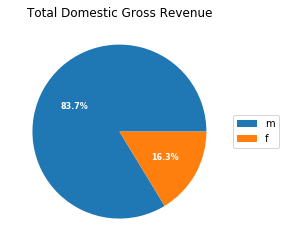

saved to  graphs/GenderFacebookLikesTotal.png


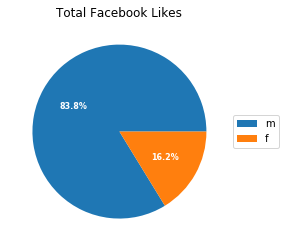

saved to  graphs/RaceGrossTotal.png


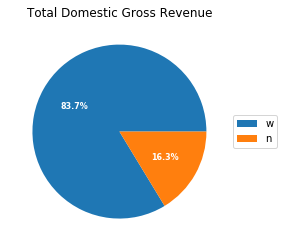

saved to  graphs/RaceFacebookLikesTotal.png


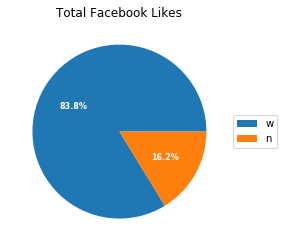

saved to  graphs/RaceandGenderGrossTotal.png


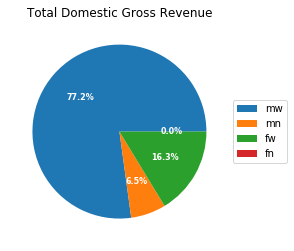

saved to  graphs/RaceandGenderFacebookLikesTotal.png


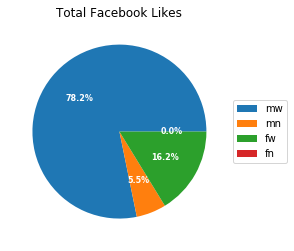

In [78]:
#Part 7: Compare total dgr & fb likes per categories with pie diagrams
vis_pie(title='Gender: Gross: Total', legend=g['category'], value=g['total_gross'], label='Total Domestic Gross Revenue')
vis_pie(title='Gender: Facebook Likes: Total', legend=g['category'], value=g['total_movie_facebook_likes'], label='Total Facebook Likes')

vis_pie(title='Race: Gross: Total', legend=r['category'], value=g['total_gross'], label='Total Domestic Gross Revenue')
vis_pie(title='Race: Facebook Likes: Total', legend=r['category'], value=g['total_movie_facebook_likes'], label='Total Facebook Likes')

vis_pie(title='Race and Gender: Gross: Total', legend=gr['category'], value=gr['total_gross'], label='Total Domestic Gross Revenue')
vis_pie(title='Race and Gender: Facebook Likes: Total', legend=gr['category'], value=gr['total_movie_facebook_likes'], label='Total Facebook Likes')